In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mrinmoy
[nltk_data]     Sadhukhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
#from gensim.models.deprecated.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import common
from common import *
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [5]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import gensim
from gensim import models, matutils
# spacy for lemmatization
#import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [6]:
import spacy

In [7]:
DocumentList = pd.read_csv("Copy of Coronavirus Tweets - Copy.csv", encoding='latin', usecols=['ID', 'Description',
                                                                                                   'Sentiment',
                                                                                                   'IsRelevant',
                                                                                                   'tfVector'])


In [8]:
DocumentList

,Description,Sentiment,IsRelevant,ID,tfVector
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,0,1,NaN
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,1,2,NaN
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,1,3,NaN
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,1,4,NaN
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Negative,0,5,NaN
...,...,...,...,...,...
41152,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral,0,41153,NaN
41153,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Negative,0,41154,NaN
41154,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive,1,41155,NaN
41155,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral,0,41156,NaN


In [27]:
for i in range(len(DocumentList)):
    if DocumentList['Sentiment'][i]=="Negative":
        DocumentList['IsRelevant'][i]=1
    else:
        DocumentList['IsRelevant'][i]=0


##Preprocessing
remove punctuation
casefolding
remove @use tag
remove #tag
remove numbers
remove http and urls
remove special characters
remove shortwords
tokenzie the tweet
remove stopwords
stemming 
?is lematizing is required?? get respected answer

In [9]:
def cleantweets(text):
    text=str(text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z#]+', ' ',text)
    text = text.lower()
    return text

In [10]:
DocumentList['Description']=DocumentList['Description'].apply(lambda x:cleantweets(x))

In [11]:
#remove short words
DocumentList['Description']=DocumentList['Description'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [12]:
#nltk pakage
tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)

DocumentList['Des_token']=DocumentList['Description'].apply(lambda x:tokenizer.tokenize(x))

##here using Tweettokenizer it is nltk pakage or CountVectorizer which is sklearn pakage

In [214]:
##sklearn pakage
def tokenize(sentence):
    token = []
    for word in CountVectorizer().build_tokenizer()(sentence):
        token.append(word)
    return token

In [215]:
DocumentList['Des_token']=DocumentList['Description'].apply(lambda x:tokenize(x))

In [13]:
stopwords_english = stopwords.words('english')
def cleanstopword(tweet_tokens):
  tweets_clean = []
  for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
      tweets_clean.append(''.join(word))
  return tweets_clean
##########################################3  

In [14]:
DocumentList['Des_token']=DocumentList['Des_token'].apply(lambda x:cleanstopword(x))

In [15]:
# Instantiate stemming class
stemmer = PorterStemmer() 
def cleanstem(tweets_clean):
  # Create an empty list to store the stems
  tweets_stem = []
  for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list
  return tweets_stem

In [16]:
#print('Words after stemming: ')
#print(tweets_stem)
DocumentList['Des_token']=DocumentList['Des_token'].apply(lambda x:cleanstem(x))

In [17]:
DocumentList

,Description,Sentiment,IsRelevant,ID,tfVector,Des_token
0,and and,Neutral,0,1,NaN,[]
1,advice talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...,Positive,1,2,NaN,"[advic, talk, neighbour, famili, exchang, phone, number, creat, contact, list, phone, number, neighbour, school, employ, chemist, set, onlin, shop, account, poss, adequ, suppli, regular, med, order]"
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak,Positive,1,3,NaN,"[coronaviru, australia, woolworth, give, elderli, disabl, dedic, shop, hour, amid, covid, outbreak]"
3,food stock not the only one which empty please don panic there will enough food for everyone you not take more than you need stay calm stay safe,Positive,1,4,NaN,"[food, stock, one, empti, pleas, panic, enough, food, everyon, take, need, stay, calm, stay, safe]"
4,ready supermarket during the outbreak not because paranoid but because food stock litteraly empty the serious thing but please don panic causes shortage,Negative,0,5,NaN,"[readi, supermarket, outbreak, paranoid, food, stock, litterali, empti, seriou, thing, pleas, panic, caus, shortag]"
...,...,...,...,...,...,...
41152,airline pilots offering stock supermarket shelves lockdown,Neutral,0,41153,NaN,"[airlin, pilot, offer, stock, supermarket, shelv, lockdown]"
41153,response complaint not provided citing covid related delays yet prompt rejecting policy before consumer tat over way,Negative,0,41154,NaN,"[respons, complaint, provid, cite, covid, relat, delay, yet, prompt, reject, polici, consum, tat, way]"
41154,you know getting tough when rationing toilet paper martinsville help out,Positive,1,41155,NaN,"[know, get, tough, ration, toilet, paper, martinsvil, help]"
41155,wrong that the smell hand sanitizer starting turn,Neutral,0,41156,NaN,"[wrong, smell, hand, sanit, start, turn]"


In [18]:
##detokenize the Des_token column to get normal sentence as in ftutre tf-idf value create further problem for this
DocumentList['Description']=DocumentList['Des_token'].apply(lambda x:TreebankWordDetokenizer().detokenize(x))

In [ ]:
#index_names = DocumentList[DocumentList['Des_token'].str.split().str.len() == 1].index
#DocumentList.drop(index_names, inplace=True)

In [221]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [222]:
#for i in range(len(DocumentList)):
#    DocumentList.at[i, 'tfVector'] = [word_count(DocumentList.iloc[i]['Description'])]
DocumentList['tfVector']=DocumentList['Description'].apply(lambda x: word_count(x))

In [223]:
DocumentList

,Description,Sentiment,IsRelevant,ID,tfVector,Des_token
0,,Neutral,0,1,{},[]
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds order,Positive,1,2,"{'advice': 1, 'talk': 1, 'neighbours': 2, 'family': 1, 'exchange': 1, 'phone': 2, 'numbers': 2, 'create': 1, 'contact': 1, 'list': 1, 'schools': 1, 'employer': 1, 'chemist': 1, 'set': 1, 'online':...","[advice, talk, neighbours, family, exchange, phone, numbers, create, contact, list, phone, numbers, neighbours, schools, employer, chemist, set, online, shopping, accounts, poss, adequate, supplie..."
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak,Positive,1,3,"{'coronavirus': 1, 'australia': 1, 'woolworths': 1, 'give': 1, 'elderly': 1, 'disabled': 1, 'dedicated': 1, 'shopping': 1, 'hours': 1, 'amid': 1, 'covid': 1, 'outbreak': 1}","[coronavirus, australia, woolworths, give, elderly, disabled, dedicated, shopping, hours, amid, covid, outbreak]"
3,food stock one empty please panic enough food everyone take need stay calm stay safe,Positive,1,4,"{'food': 2, 'stock': 1, 'one': 1, 'empty': 1, 'please': 1, 'panic': 1, 'enough': 1, 'everyone': 1, 'take': 1, 'need': 1, 'stay': 2, 'calm': 1, 'safe': 1}","[food, stock, one, empty, please, panic, enough, food, everyone, take, need, stay, calm, stay, safe]"
4,ready supermarket outbreak paranoid food stock litteraly empty serious thing please panic causes shortage,Negative,0,5,"{'ready': 1, 'supermarket': 1, 'outbreak': 1, 'paranoid': 1, 'food': 1, 'stock': 1, 'litteraly': 1, 'empty': 1, 'serious': 1, 'thing': 1, 'please': 1, 'panic': 1, 'causes': 1, 'shortage': 1}","[ready, supermarket, outbreak, paranoid, food, stock, litteraly, empty, serious, thing, please, panic, causes, shortage]"
...,...,...,...,...,...,...
41152,airline pilots offering stock supermarket shelves lockdown,Neutral,0,41153,"{'airline': 1, 'pilots': 1, 'offering': 1, 'stock': 1, 'supermarket': 1, 'shelves': 1, 'lockdown': 1}","[airline, pilots, offering, stock, supermarket, shelves, lockdown]"
41153,response complaint provided citing covid related delays yet prompt rejecting policy consumer tat way,Negative,0,41154,"{'response': 1, 'complaint': 1, 'provided': 1, 'citing': 1, 'covid': 1, 'related': 1, 'delays': 1, 'yet': 1, 'prompt': 1, 'rejecting': 1, 'policy': 1, 'consumer': 1, 'tat': 1, 'way': 1}","[response, complaint, provided, citing, covid, related, delays, yet, prompt, rejecting, policy, consumer, tat, way]"
41154,know getting tough rationing toilet paper martinsville help,Positive,1,41155,"{'know': 1, 'getting': 1, 'tough': 1, 'rationing': 1, 'toilet': 1, 'paper': 1, 'martinsville': 1, 'help': 1}","[know, getting, tough, rationing, toilet, paper, martinsville, help]"
41155,wrong smell hand sanitizer starting turn,Neutral,0,41156,"{'wrong': 1, 'smell': 1, 'hand': 1, 'sanitizer': 1, 'starting': 1, 'turn': 1}","[wrong, smell, hand, sanitizer, starting, turn]"


In [243]:
tweets_text_postive_temp=DocumentList[DocumentList['Sentiment']=='Positive']
tweets_text_postive=tweets_text_postive_temp[['Description','Sentiment']].copy()
tweets_text_postive
sentences=tweets_text_postive['Description']
max_df=1.0                 ###???
min_df=0.0                 ####????
vocab=None
count_vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, vocabulary=vocab, ngram_range=(1,2))  # stop_words='english, max_features=N_FEATURES 
cvec = count_vectorizer.fit(sentences)
feature_names = cvec.get_feature_names()
bag_of_words = cvec.transform(sentences)
transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf = transformer.fit_transform(bag_of_words)
# print idf values 
df_idf = pd.DataFrame(transformer.idf_, index=cvec.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights']) ###idf values 
word_cnts = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()  # for each word in column, sum all row counts
df_cnts = pd.DataFrame({'word': feature_names, 'count': word_cnts})
df_cnts = df_cnts.sort_values('count', ascending=False)

    # Build word weights as a list and sort them
weights = np.asarray(tfidf.sum(axis=0)).ravel().tolist()
df_weights = pd.DataFrame({'word': feature_names, 'weight': weights })
df_weights = df_weights.sort_values('weight', ascending=False)

df_weights = df_weights.merge(df_cnts, on='word', how='left')
##df_weights_1=df_weights.merge(df_idf)
df_weights = df_weights[['word', 'count', 'weight']]
df_weights.to_csv('hk.csv')

In [244]:
print(df_weights[:31])

              word  count      weight
0            covid   4667  243.906424
1            store   3340  220.303172
2          grocery   2942  207.895416
3      supermarket   2886  193.077171
4           prices   2964  189.121883
5             food   2717  177.935149
6    grocery store   2296  176.764832
7              amp   2656  168.935676
8             hand   1807  158.525116
9           people   2301  157.516698
10       sanitizer   1658  152.005207
11        consumer   2039  146.073079
12          online   1765  139.648347
13            like   1695  135.984395
14        shopping   1701  135.468899
15            help   1691  131.248127
16  hand sanitizer   1325  129.698210
17         workers   1521  128.069562
18             get   1364  111.032295
19            need   1315  108.653072
20          please   1207  105.322512
21        pandemic   1227  103.361156
22            home   1181   99.486962
23            time   1168   96.762592
24            stay    913   88.069726
25          

##operations
Get all terms in collection
Index creation

In [ ]:
#DocumentList = DocumentList[0:100]

In [226]:
def getAllTerms(textList):
    terms = []
    for i in range(len(textList)):
        for j in range(len(textList[i])):
            terms.append(textList[i][j])
    return sorted(set(terms))

In [227]:
terms = getAllTerms(DocumentList['Des_token'])

In [79]:
def createIndex(textList, docno):
    terms = getAllTerms(textList)
    proximity = {}
    for term in terms:
        position = {}
        for n in range(len(textList)):
            if(term in textList[n]):
                position[docno[n]] = []
                for i in range(len(textList[n])):
                    if(term == textList[n][i]):
                        position[docno[n]].append(i)
        proximity[term] = position
    return proximity

In [31]:
docno=[]
for row in DocumentList.index:
    #print(row, end = " ")
    docno.append(row)

In [ ]:
index=createIndex(DocumentList['Des_token'],docno)

In [ ]:
## index printing 
index

##can i implement threaded program to speed up linear task of indexing in n fold.??

In [ ]:
def exportIndex(index, filename):
    file = open(filename,'w')
    for n in index:
        file.write(n+'\n')
        #print(n)
        for o in index[n]:
            #print(o)
            file.write('\t'+ str(o) +': ')
            for p in range(len(index[n][o])):
                file.write(str(index[n][o][p]))
                if(p<len(index[n][o])-1):
                    file.write(', ')
                else:
                    file.write('\n')
    file.close()
    return "Index's file has been successfully created."

In [ ]:
exportIndex(index, 'INDEX.txt')

In [88]:
import pickle
def loadFromPickle(pickleFile):
	file = open(pickleFile,'rb')
	pickleData = pickle.load(file)
	file.close()
	return pickleData

def saveInPickle(data, pickleFile):
	file = open(pickleFile,"wb")
	pickle.dump(data,file)
	file.close()
saveInPickle(index, "index")

NameError: name 'index' is not defined

In [89]:
index = loadFromPickle('index')

In [228]:
#termfrequencies calculation
termfrequencies=dict()
for n in index:
    if not n in termfrequencies:
        termfrequencies[n] = 1
    else:
        termfrequencies[n] = termfrequencies[n]+1


In [229]:
termfrequencies

{'aaa': 1,
 'aaaaa': 1,
 'aaaand': 1,
 'aaannnddd': 1,
 'aabutan': 1,
 'aahh': 1,
 'aajeevika': 1,
 'aalto': 1,
 'aamen': 1,
 'aantal': 1,
 'aap': 1,
 'aapi': 1,
 'aapk': 1,
 'aapka': 1,
 'aapl': 1,
 'aaron': 1,
 'aarp': 1,
 'aata': 1,
 'ab': 1,
 'aba': 1,
 'abajila': 1,
 'abandon': 1,
 'abass': 1,
 'abat': 1,
 'abattoir': 1,
 'abbey': 1,
 'abbott': 1,
 'abbrevi': 1,
 'abc': 1,
 'abd': 1,
 'abdijan': 1,
 'abdul': 1,
 'abdulaziz': 1,
 'abdulla': 1,
 'abdulwahab': 1,
 'abe': 1,
 'abeg': 1,
 'aber': 1,
 'aberdar': 1,
 'aberdeen': 1,
 'abhijit': 1,
 'abhimanyu': 1,
 'abhishek': 1,
 'abhor': 1,
 'abi': 1,
 'abid': 1,
 'abideth': 1,
 'abil': 1,
 'abilen': 1,
 'abili': 1,
 'abilti': 1,
 'abit': 1,
 'abl': 1,
 'ableism': 1,
 'abnorm': 1,
 'abo': 1,
 'aboard': 1,
 'abod': 1,
 'abolish': 1,
 'abomin': 1,
 'abort': 1,
 'abou': 1,
 'abound': 1,
 'abourezk': 1,
 'abraham': 1,
 'abram': 1,
 'abrami': 1,
 'abramovich': 1,
 'abras': 1,
 'abreast': 1,
 'abridg': 1,
 'abril': 1,
 'abrir': 1,
 'abroad': 

##Ranked Retrival

In [92]:
import math

In [93]:
for term in sorted(index, key=lambda posting: len(index[posting].keys())):
            print("%-30s %-2s:%-3d %-2s:%-3d %-3s:%-10f" % (
                term, "TF", termfrequencies[term], "DF", len(index[term]), "IDF",
                math.log(float(len(DocumentList)) / len(index[term].keys()), 10)))

aaaaa                          TF:1   DF:1   IDF:4.614444  
aaaand                         TF:1   DF:1   IDF:4.614444  
aaannnddd                      TF:1   DF:1   IDF:4.614444  
aabutan                        TF:1   DF:1   IDF:4.614444  
aahh                           TF:1   DF:1   IDF:4.614444  
aajeevika                      TF:1   DF:1   IDF:4.614444  
aamen                          TF:1   DF:1   IDF:4.614444  
aantal                         TF:1   DF:1   IDF:4.614444  
aapi                           TF:1   DF:1   IDF:4.614444  
aapk                           TF:1   DF:1   IDF:4.614444  
aapka                          TF:1   DF:1   IDF:4.614444  
aarp                           TF:1   DF:1   IDF:4.614444  
aata                           TF:1   DF:1   IDF:4.614444  
aba                            TF:1   DF:1   IDF:4.614444  
abajila                        TF:1   DF:1   IDF:4.614444  
abass                          TF:1   DF:1   IDF:4.614444  
abbey                          TF:1   DF

In [230]:
weights = {}
for term in index:
    sterm = term
    weights[sterm] = 0.0  # initialize weight vector for each key in inverted file
    

In [231]:
weights

{'aaa': 0.0,
 'aaaaa': 0.0,
 'aaaand': 0.0,
 'aaannnddd': 0.0,
 'aabutan': 0.0,
 'aahh': 0.0,
 'aajeevika': 0.0,
 'aalto': 0.0,
 'aamen': 0.0,
 'aantal': 0.0,
 'aap': 0.0,
 'aapi': 0.0,
 'aapk': 0.0,
 'aapka': 0.0,
 'aapl': 0.0,
 'aaron': 0.0,
 'aarp': 0.0,
 'aata': 0.0,
 'ab': 0.0,
 'aba': 0.0,
 'abajila': 0.0,
 'abandon': 0.0,
 'abass': 0.0,
 'abat': 0.0,
 'abattoir': 0.0,
 'abbey': 0.0,
 'abbott': 0.0,
 'abbrevi': 0.0,
 'abc': 0.0,
 'abd': 0.0,
 'abdijan': 0.0,
 'abdul': 0.0,
 'abdulaziz': 0.0,
 'abdulla': 0.0,
 'abdulwahab': 0.0,
 'abe': 0.0,
 'abeg': 0.0,
 'aber': 0.0,
 'aberdar': 0.0,
 'aberdeen': 0.0,
 'abhijit': 0.0,
 'abhimanyu': 0.0,
 'abhishek': 0.0,
 'abhor': 0.0,
 'abi': 0.0,
 'abid': 0.0,
 'abideth': 0.0,
 'abil': 0.0,
 'abilen': 0.0,
 'abili': 0.0,
 'abilti': 0.0,
 'abit': 0.0,
 'abl': 0.0,
 'ableism': 0.0,
 'abnorm': 0.0,
 'abo': 0.0,
 'aboard': 0.0,
 'abod': 0.0,
 'abolish': 0.0,
 'abomin': 0.0,
 'abort': 0.0,
 'abou': 0.0,
 'abound': 0.0,
 'abourezk': 0.0,
 'abraham':

## relevant and nonrelevant document searching 
## weight calculation of relevant and nonrelevant document

In [249]:
relevantDocuments = []
nonrelevantDocuments = []
relevantDocsTFWeights = {}
nonrelevantDocsTFWeights = {}
for i in range(len(DocumentList)):

            DocumentList.iloc[i]['ID'] = i
            if DocumentList.iloc[i]['IsRelevant'] == 1:
                relevantDocuments.append(i)
                

            elif DocumentList.iloc[i]['IsRelevant'] == 0:

                nonrelevantDocuments.append(i)
            else:
                print('Invalid value entered!')

In [250]:
for docId in relevantDocuments:
    doc = DocumentList.iloc[docId]
    for term in doc["tfVector"]:
        sterm=term
        if sterm in relevantDocsTFWeights:
            relevantDocsTFWeights[sterm] = relevantDocsTFWeights[sterm] + doc["tfVector"][term]
        else:
            relevantDocsTFWeights[sterm] = doc["tfVector"][term]


In [251]:
for docId in nonrelevantDocuments:
    doc = DocumentList.iloc[docId]

    for term in doc["tfVector"]:
                #print(term)
        sterm = term
        if sterm in nonrelevantDocsTFWeights:
            nonrelevantDocsTFWeights[sterm] = nonrelevantDocsTFWeights[sterm] + doc["tfVector"][term]
        else:
            nonrelevantDocsTFWeights[sterm] = doc["tfVector"][term]

In [252]:
DocumentList

,Description,Sentiment,IsRelevant,ID,tfVector,Des_token
0,,Neutral,0,1,{},[]
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds order,Positive,1,2,"{'advice': 1, 'talk': 1, 'neighbours': 2, 'family': 1, 'exchange': 1, 'phone': 2, 'numbers': 2, 'create': 1, 'contact': 1, 'list': 1, 'schools': 1, 'employer': 1, 'chemist': 1, 'set': 1, 'online':...","[advice, talk, neighbours, family, exchange, phone, numbers, create, contact, list, phone, numbers, neighbours, schools, employer, chemist, set, online, shopping, accounts, poss, adequate, supplie..."
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak,Positive,1,3,"{'coronavirus': 1, 'australia': 1, 'woolworths': 1, 'give': 1, 'elderly': 1, 'disabled': 1, 'dedicated': 1, 'shopping': 1, 'hours': 1, 'amid': 1, 'covid': 1, 'outbreak': 1}","[coronavirus, australia, woolworths, give, elderly, disabled, dedicated, shopping, hours, amid, covid, outbreak]"
3,food stock one empty please panic enough food everyone take need stay calm stay safe,Positive,1,4,"{'food': 2, 'stock': 1, 'one': 1, 'empty': 1, 'please': 1, 'panic': 1, 'enough': 1, 'everyone': 1, 'take': 1, 'need': 1, 'stay': 2, 'calm': 1, 'safe': 1}","[food, stock, one, empty, please, panic, enough, food, everyone, take, need, stay, calm, stay, safe]"
4,ready supermarket outbreak paranoid food stock litteraly empty serious thing please panic causes shortage,Negative,0,5,"{'ready': 1, 'supermarket': 1, 'outbreak': 1, 'paranoid': 1, 'food': 1, 'stock': 1, 'litteraly': 1, 'empty': 1, 'serious': 1, 'thing': 1, 'please': 1, 'panic': 1, 'causes': 1, 'shortage': 1}","[ready, supermarket, outbreak, paranoid, food, stock, litteraly, empty, serious, thing, please, panic, causes, shortage]"
...,...,...,...,...,...,...
41152,airline pilots offering stock supermarket shelves lockdown,Neutral,0,41153,"{'airline': 1, 'pilots': 1, 'offering': 1, 'stock': 1, 'supermarket': 1, 'shelves': 1, 'lockdown': 1}","[airline, pilots, offering, stock, supermarket, shelves, lockdown]"
41153,response complaint provided citing covid related delays yet prompt rejecting policy consumer tat way,Negative,0,41154,"{'response': 1, 'complaint': 1, 'provided': 1, 'citing': 1, 'covid': 1, 'related': 1, 'delays': 1, 'yet': 1, 'prompt': 1, 'rejecting': 1, 'policy': 1, 'consumer': 1, 'tat': 1, 'way': 1}","[response, complaint, provided, citing, covid, related, delays, yet, prompt, rejecting, policy, consumer, tat, way]"
41154,know getting tough rationing toilet paper martinsville help,Positive,1,41155,"{'know': 1, 'getting': 1, 'tough': 1, 'rationing': 1, 'toilet': 1, 'paper': 1, 'martinsville': 1, 'help': 1}","[know, getting, tough, rationing, toilet, paper, martinsville, help]"
41155,wrong smell hand sanitizer starting turn,Neutral,0,41156,"{'wrong': 1, 'smell': 1, 'hand': 1, 'sanitizer': 1, 'starting': 1, 'turn': 1}","[wrong, smell, hand, sanitizer, starting, turn]"


## Query vector formation by preprocessing

In [237]:
def removePunctuation(textList):
    for i in range(len(textList)):
        for punct in string.punctuation:
            textList[i] = textList[i].replace(punct, " ")
        textList[i] = re.sub(r'^https?:\/\/.*[\r\n]*', '', textList[i], flags=re.MULTILINE)
    return textList

def caseFolding(textList):
    text = []
    for i in range(len(textList)):
        text.append(textList[i].lower())
    return text

def token(sentence):
    token = []
    for word in CountVectorizer().build_tokenizer()(sentence):
        token.append(word)
    return token

def tokenize(textList):
    tokens = []
    for i in range(len(textList)):
        tokens.append(token(textList[i]))
    return tokens

def checkStopword(sentence, stop_words):
    sentence = [w for w in sentence if not w in stop_words]
    return sentence
    
def stopwordRemove(textList):
    stop_words = set(stopwords.words('english'))
    text = []
    for i in range(len(textList)):
        text.append(checkStopword(textList[i], stop_words))
    return text

def numberRemove(textList):
    text = []
    for i in range(len(textList)):
        text.append([w for w in textList[i] if not any(j.isdigit() for j in w)])
    return text

def stemming(textList):
    stemmer = PorterStemmer()
    text = textList
    for i in range(len(textList)):
        for j in range(len(textList[i])):
            text[i][j] = stemmer.stem(text[i][j])
    return text

def sorting(textList):
    for i in range(len(textList)):
        textList[i] = sorted(textList[i])
    return textList


In [62]:
raw_query=["covid maoo"]
query = removePunctuation(raw_query)
query = caseFolding(query)
query = tokenize(query)
query = stopwordRemove(query)
query = numberRemove(query)
query = stemming(query)

In [63]:
query=query[0]
query

['covid', 'maoo']

In [64]:
queryvector={}
for i in query:
    print(i)
    queryvector[i]=1.0 ##inintial query vector setting as 1.0

covid
maoo


## Rocchio Algorithim formation...

In [43]:
ALPHA = 0
BETA = 1.0
GAMMA = 1.0

In [44]:
for term in index: #index file
    idf = math.log(float(len(DocumentList)) / float(len(index[term].keys())), 10)

    sterm = term
    # Terms 2 and 3 of Rocchio algorithm
    for docId in index[term]:
        if DocumentList.iloc[docId]['IsRelevant'] == 1:
            # Term 2: Relevant documents weights normalized and given BETA weight
            weights[sterm] = weights[sterm] + BETA * idf * (relevantDocsTFWeights[sterm] / len(relevantDocuments))
        else:
            # Term 3: NonRelevant documents weights normalized and given BETA weight
            weights[sterm] = weights[sterm] - GAMMA * idf * (nonrelevantDocsTFWeights[sterm] / len(nonrelevantDocuments))

            # Term 1 of Rocchio, query terms
    if term in queryvector:
        queryvector[term] = ALPHA * queryvector[term] + weights[sterm]  # build new query vector of weights
    elif weights[sterm] > 0:
        queryvector[term] = weights[sterm]


In [45]:
queryvector

{'covid': -204.19201509421222,
 'vaccin': -0.06684072565013709,
 'aaaaa': 0.0002557045168358643,
 'aabutan': 0.0002557045168358643,
 'aahh': 0.0002557045168358643,
 'aajeevika': 0.0002557045168358643,
 'aalto': 0.0007380417681263075,
 'aamen': 0.0002557045168358643,
 'aap': 0.0007380417681263075,
 'aapk': 0.0002557045168358643,
 'aapka': 0.0002557045168358643,
 'aaron': 0.004569467686225218,
 'aata': 0.0002557045168358643,
 'abajila': 0.0002557045168358643,
 'abass': 0.0002557045168358643,
 'abbott': 0.00019491363013099774,
 'abd': 0.0002557045168358643,
 'abdijan': 5.2384267324283334e-05,
 'abdul': 0.00127506510148209,
 'abdulaziz': 0.0002557045168358643,
 'abe': 0.0002557045168358643,
 'aberdeen': 5.2384267324283334e-05,
 'abhimanyu': 0.0002557045168358643,
 'abid': 0.002063927595864237,
 'abideth': 0.0009560930322854984,
 'abil': 0.18557826842484734,
 'abilen': 5.2384267324283334e-05,
 'abilti': 0.0002557045168358643,
 'abl': 1.8981930880292068,
 'abnorm': 0.005424295836312739,
 'ab

In [46]:
sorted(queryvector.items(), key=lambda x: x[1], reverse=True)[:10]

[('hand', 266.196608614274),
 ('help', 259.2574089302972),
 ('sanit', 214.69049565235034),
 ('like', 172.28443967668954),
 ('thank', 120.47827137388563),
 ('pleas', 94.66147784815738),
 ('worker', 79.16493065025237),
 ('amp', 76.41578448177889),
 ('safe', 70.09381715628584),
 ('good', 58.93033376682945)]

In [254]:
QUERY_SKIP_TERMS = {"about": True,
                    "above": True,
                    "after": True,
                    "again": True,
                    "against": True,
                    "all": True,
                    "am": True,
                    "an": True,
                    "and": True,
                    "any": True,
                    "are": True,
                    "aren": True,
                    "as": True,
                    "at": True,
                    "be": True,
                    "because": True,
                    "been": True,
                    "before": True,
                    "being": True,
                    "below": True,
                    "between": True,
                    "both": True,
                    "but": True,
                    "by": True,
                    "can": True,
                    "cannot": True,
                    "could": True,
                    "couldn": True,
                    "did": True,
                    "didn": True,
                    "do": True,
                    "does": True,
                    "doesn": True,
                    "doing": True,
                    "don": True,
                    "down": True,
                    "during": True,
                    "each": True,
                    "few": True,
                    "for": True,
                    "from": True,
                    "further": True,
                    "had": True,
                    "hadn": True,
                    "has": True,
                    "hasn": True,
                    "have": True,
                    "haven": True,
                    "having": True,
                    "he": True,
                    "her": True,
                    "here": True,
                    "here": True,
                    "hers": True,
                    "herself": True,
                    "him": True,
                    "himself": True,
                    "his": True,
                    "how": True,
                    "how": True,
                    "if": True,
                    "in": True,
                    "into": True,
                    "is": True,
                    "isn": True,
                    "it": True,
                    "its": True,
                    "itself": True,
                    "let": True,
                    "me": True,
                    "more": True,
                    "most": True,
                    "mustn": True,
                    "my": True,
                    "myself": True,
                    "no": True,
                    "nor": True,
                    "not": True,
                    "of": True,
                    "off": True,
                    "on": True,
                    "once": True,
                    "only": True,
                    "or": True,
                    "other": True,
                    "ought": True,
                    "our": True,
                    "ours": True,
                    "ourselves": True,
                    "out": True,
                    "over": True,
                    "own": True,
                    "same": True,
                    "shan": True,
                    "she": True,
                    "should": True,
                    "shouldn": True,
                    "so": True,
                    "some": True,
                    "such": True,
                    "than": True,
                    "that": True,
                    "the": True,
                    "their": True,
                    "theirs": True,
                    "them": True,
                    "themselves": True,
                    "then": True,
                    "there": True,
                    "these": True,
                    "they": True,
                    "this": True,
                    "those": True,
                    "through": True,
                    "to": True,
                    "too": True,
                    "under": True,
                    "until": True,
                    "up": True,
                    "very": True,
                    "was": True,
                    "wasn": True,
                    "we": True,
                    "were": True,
                    "weren": True,
                    "what": True,
                    "when": True,
                    "where": True,
                    "which": True,
                    "while": True,
                    "who": True,
                    "whom": True,
                    "why": True,
                    "with": True,
                    "would": True,
                    "wouldn": True,
                    "you": True,
                    "your": True,
                    "yours": True,
                    "yourself": True,
                    "yourselves": True}


In [253]:
def getTopTerms(currentQuery, weightsMap,topX=2):

    p = PorterStemmer()
    current_terms = []
    # for term in currentQuery.split():
    #     term = p.stem(term.lower(), 0,len(term)-1)
    #     current_terms.append(term)
        

    i = 0
    terms = []
    for term in sorted(weightsMap, key=weightsMap.get, reverse=True):
        if term in QUERY_SKIP_TERMS or term in current_terms:
            continue
        terms.append(term)
        current_terms.append(term)
        i = i + 1
        if (topX != 'ALL' and i >= topX):
            break;

    return terms


In [95]:
termvector=getTopTerms(query,queryvector,2)

NameError: name 'queryvector' is not defined

In [50]:
termvector

['hand', 'help']

## any second method to find query vector for rocchio?

In [255]:
# RANKED RETRIEVAL FUNCTION
def queryInIndex(query, index):
    result = []
    for word in query:
        if word in index:
            result.append(word)
    return result

def df(query, index):
    docFreq = {}
    for word in query:
        if word in index:
            docFreq[word] = len(index[word])
    return docFreq

def idf(df, N):
    inv = {}
    for word in df:
        inv[word] = math.log10(N/df[word])
    return inv

def tf(query, index):
    termFreq = {}
    for word in query:
        freq = {}
        if word in index:
            for i in index[word]:
                freq[i] = len(index[word][i])
        termFreq[word] = freq
    return termFreq

def tfidf(tf, idf):
    w = {}
    for word in tf:
        wtd = {}
        for doc in tf[word]:
            wtd[doc] = (1+(math.log10(tf[word][doc])))*idf[word]
        w[word] = wtd
    return w
    
def score(TFIDF):
    res = {}
    for i in TFIDF:
        for j in TFIDF[i]:
            res[j] = 0
    for i in TFIDF:
        for j in TFIDF[i]:
            res[j] = res[j]+TFIDF[i][j]
    sorted_dict = sorted(res, key=res.get, reverse=True)
    return sorted_dict

In [256]:
newQuery = []
def vector(text ,terms):
    Vec = []
    for i in range(len(terms)):
        if(terms[i] in text):
            #print('ok')
            Vec.append(1)
        else:
            Vec.append(0)
    return Vec

def expansion(query, relevan, irrelevan, a, b, c):
    result = {}
    exp    = []
    irrel  = irrelevan[0]
    rel    = relevan[0]
    b      = b / len(relevan)
    c      = c / len(irrelevan)
    
    for i in range(1,len(relevan)):
        for j in range(len(relevan[i])):
            rel[j] = rel[j] + relevan[i][j]
            irrel[j] = irrel[j] + irrelevan[i][j]
            
    for i in range(len(rel)):
        rel[i] = b*rel[i]
        irrel[i] = c*irrel[i]
        query[i] = a*query[i]
        
    for i in range(len(rel)):
        exp.append(query[i]+rel[i]-irrel[i])
        
    for i in range(len(exp)):
        if(exp[i]>0):
            result[i] = exp[i]
        
    return result


In [257]:
Query=df_weights['word']
#query=[]
#query.append(Query[2])
#print(query)

In [258]:
Query

0                 covid
1                 store
2               grocery
3           supermarket
4                prices
              ...      
204874           chaque
204875        commerces
204876    notre conomie
204877    commerces bec
204878      achat local
Name: word, Length: 204879, dtype: object

In [100]:
query=queryInIndex(query,index)
N               = len(DocumentList)
tfidf_list      = []

docFrequency    = df(query, index)
invDocFrequency = idf(docFrequency, N)
termFrequency   = tf(query, index)
TFIDF           = tfidf(termFrequency, invDocFrequency)
sc              = score(TFIDF)

In [259]:
def notRelevance(rel, docsNumber):
    notRelevanceNumber = []
    for i in docsNumber:
        if int(i) not in (rel):
            notRelevanceNumber.append(int(i))
    return notRelevanceNumber

In [260]:
i=0
for i in range(30):   ###30
    query=[]
    query.append(Query[i])
    query = removePunctuation(query)
    query = caseFolding(query)
    query = tokenize(query)
    query = stopwordRemove(query)
    query = numberRemove(query)
    query = stemming(query)
    query=query[0]
    print(query)
    query=queryInIndex(query,index)
    N = len(DocumentList)
    tfidf_list = []
    docFrequency = df(query, index)
    invDocFrequency = idf(docFrequency, N)
    termFrequency = tf(query, index)
    TFIDF = tfidf(termFrequency, invDocFrequency)
    sc = score(TFIDF)
    relevanceDocNumber=[]
    for i in range(len(sc)):
        relevanceDocNumber.append(int(sc[i]))
    nonrelevanceDocNumber=[]
    nonrelevanceDocNumber = notRelevance(relevanceDocNumber, relevantDocuments)
    queryVec =  vector(query, terms)
    relevanVec    = []
    notRelevanVec = []
    for i in relevanceDocNumber:
        relevanVec.append(vector(DocumentList['Des_token'][i], terms))
    for i in nonrelevanceDocNumber:
        notRelevanVec.append(vector(DocumentList['Des_token'][i], terms))
    expansionVec = expansion(queryVec, relevanVec, notRelevanVec, 0.1, 0.1, 2000)## alpha beta gama??
    newQuery1 = []
    newQuery2=[]
    for i in expansionVec:
        newQuery1.append(terms[int(i)])
    termvector=getTopTerms(query,expansionVec,10)
    for i in termvector:
        newQuery2.append(terms[int(i)])
    newQuery.append(newQuery2)
    
    


['covid']
['store']
['groceri']
['supermarket']
['price']
['food']
['groceri', 'store']
['amp']
['hand']
['peopl']
['sanit']
['consum']
['onlin']
['like']
['shop']
['help']
['hand', 'sanit']
['worker']
['get']
['need']
['pleas']
['pandem']
['home']
['time']
['stay']
['safe']
['stock']
['thank']
['demand']
['go']


In [104]:
relevanceDocNumber=[]
for i in range(len(sc)):
    relevanceDocNumber.append(int(sc[i]))
    

In [105]:
nonrelevanceDocNumber=[]
nonrelevanceDocNumber = notRelevance(relevanceDocNumber, relevantDocuments)

In [50]:
queryVec =  vector(query, terms)

In [51]:
relevanVec    = []
notRelevanVec = []

for i in relevanceDocNumber:
    relevanVec.append(vector(DocumentList['Des_token'][i], terms))
    

In [52]:
for i in nonrelevanceDocNumber:
    notRelevanVec.append(vector(DocumentList['Des_token'][i], terms))
   

In [80]:
len(nonrelevantDocuments)

23111

In [53]:
expansionVec = expansion(queryVec, relevanVec, notRelevanVec, 0.1, 0.1, 2000)## alpha beta gama??

In [54]:
newQuery1 = []
for i in expansionVec:
    newQuery1.append(terms[int(i)])

In [55]:
termvector=getTopTerms(query,expansionVec,10)

In [56]:
termvector

[8241, 2042, 21880, 11326, 19550, 11165, 14618, 9475, 12012, 21051]

In [57]:
for i in termvector:
    newQuery.append(terms[int(i)])

In [261]:
newQuery

[['covid',
  'hardships',
  'fargo',
  'fraudsters',
  'killed',
  'turbo',
  'burden',
  'mifi',
  'chart',
  'examines'],
 ['store',
  'stores',
  'clerk',
  'coughed',
  'birx',
  'wore',
  'assholes',
  'pennsylvania',
  'athletes',
  'coordinator'],
 ['grocery',
  'groceries',
  'coughed',
  'birx',
  'wore',
  'assholes',
  'athletes',
  'licking',
  'teenagers',
  'venture'],
 ['supermarket',
  'supermarkets',
  'queuing',
  'sweep',
  'spitting',
  'sydney',
  'stacking',
  'deliberately',
  'miles',
  'idiot'],
 ['price',
  'prices',
  'crude',
  'hiking',
  'opec',
  'pricing',
  'exorbitant',
  'cents',
  'plummet',
  'inflating'],
 ['food',
  'foods',
  'insecurity',
  'beverage',
  'stamps',
  'dumping',
  'grains',
  'spikes',
  'stuffs',
  'combined'],
 ['store',
  'grocery',
  'stores',
  'groceries',
  'clerk',
  'birx',
  'assholes',
  'athletes',
  'licking',
  'coordinator'],
 ['amp',
  'easter',
  'suffer',
  'feb',
  'youth',
  'commissioner',
  'corruption',
  'e

In [19]:
import pickle

In [262]:
with open("positive_extended_query_set", "wb") as fp:
    pickle.dump(newQuery, fp)

In [28]:
with open("negative_extended_query_set", "rb") as fp:
    newQuery = pickle.load(fp)

In [29]:
newQuery

[['price',
  'qualiti',
  'extortion',
  'volatil',
  'sharpli',
  'petroleum',
  'rebound',
  'hindustan',
  'downturn',
  'currenc'],
 ['covid',
  'manchest',
  'fargo',
  'collabor',
  'turbo',
  'mifi',
  'cleanli',
  'cite',
  'repair',
  'victoria'],
 ['food',
  'cat',
  'stamp',
  'suffici',
  'manchest',
  'firearm',
  'relax',
  'needi',
  'cater',
  'redistribut'],
 ['supermarket',
  'bonu',
  'stacker',
  'gratitud',
  'bent',
  'chancellor',
  'hug',
  'survivalist',
  'brescia',
  'porter'],
 ['store',
  'paisley',
  'brad',
  'birx',
  'athlet',
  'prais',
  'bonu',
  'cowork',
  'hug',
  'lineup'],
 ['peopl',
  'postal',
  'relax',
  'clap',
  'hug',
  'corrupt',
  'databas',
  'artist',
  'milkman',
  'transmit'],
 ['groceri',
  'paisley',
  'brad',
  'birx',
  'athlet',
  'hug',
  'prais',
  'lineup',
  'terrorist',
  'bandana'],
 ['panic',
  'insecur',
  'toiletri',
  'resist',
  'secretari',
  'sm',
  'adot',
  'ayurv',
  'bless',
  'cleanli'],
 ['buy',
  'psycholog'

In [22]:
id2word = corpora.Dictionary(newQuery) ### from here rochhio expansion system will entry !! may be

# Create Corpus
texts = DocumentList['Des_token']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:2])

[[], [(111, 1), (126, 1)]]


In [23]:
print(corpus[:4])

[[], [(111, 1), (126, 1)], [(2, 1), (126, 1)], [(48, 2), (157, 1), (167, 1), (199, 2), (210, 1), (217, 1)]]


In [24]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[], [('onlin', 1), ('shop', 1)]]

In [266]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, ##corpus is lsit of texts with term frequency of rocchio word it can be taken any length and or tf-idf value
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [267]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.576*"covid" + 0.189*"supermarket" + 0.081*"like" + 0.044*"please" + '
  '0.017*"easter" + 0.016*"died" + 0.008*"die" + 0.007*"helping" + '
  '0.006*"death" + 0.005*"white"'),
 (1,
  '0.240*"prices" + 0.145*"food" + 0.103*"people" + 0.077*"demand" + '
  '0.057*"get" + 0.054*"time" + 0.054*"help" + 0.051*"need" + 0.040*"going" + '
  '0.034*"stock"'),
 (2,
  '0.178*"pandemic" + 0.153*"sanitizer" + 0.127*"hand" + 0.108*"home" + '
  '0.060*"stay" + 0.052*"price" + 0.047*"consumers" + 0.042*"safe" + '
  '0.031*"times" + 0.027*"hands"'),
 (3,
  '0.355*"consumer" + 0.177*"online" + 0.156*"shopping" + 0.121*"workers" + '
  '0.028*"scams" + 0.026*"needs" + 0.021*"thanks" + 0.019*"sentiment" + '
  '0.018*"groceries" + 0.011*"foods"'),
 (4,
  '0.281*"amp" + 0.260*"store" + 0.254*"grocery" + 0.051*"stores" + '
  '0.032*"thank" + 0.021*"likely" + 0.015*"needed" + 0.014*"shops" + '
  '0.014*"reduced" + 0.008*"scientists"')]


In [268]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.8984502590527184

Coherence Score:  0.4010288386878059


In [269]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,mds='mmds')
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.286371 -0.312532       1        1  32.079806
0     -0.044918  0.406881       2        1  20.510215
4     -0.211588 -0.370416       3        1  17.197827
2     -0.419480  0.093731       4        1  15.644796
3      0.389615  0.182337       5        1  14.567356, topic_info=                Term          Freq         Total Category  logprob  loglift
2              covid  14675.000000  14675.000000  Default  30.0000  30.0000
97          consumer   6431.000000   6431.000000  Default  29.0000  29.0000
43            prices   9564.000000   9564.000000  Default  28.0000  28.0000
55               amp   5993.000000   5993.000000  Default  27.0000  27.0000
17             store   5549.000000   5549.000000  Default  26.0000  26.0000
..               ...           ...           ...      ...      ...      ...
130            spree     38.522347     39.360155   Topic5  -6.1521   1.9049
155            sucks     23.755726     24.588112   Topic5  -6.6355   1.8919
194           timing     20.058732     20.939230   Topic5  -6.8047   1.8834
89        sanitation     16.914175     17.737188   Topic5  -6.9752   1.8789
108  easyfundraising     16.637073     17.562922   Topic5  -6.9917   1.8722

[182 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
148       3  0.955196        abuse
196       4  0.990351   activities
105       5  0.991797  advertising
84        4  0.989623         aloe
55        3  0.999941          amp
...     ...       ...          ...
19        2  0.980153         wore
146       4  0.998063       worker
147       5  0.999730      workers
244       1  0.993765        worst
63        3  0.977485        youth

[157 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])

In [25]:
import os
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})

In [31]:
mallet_path = 'C:/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics= 38, id2word=id2word,prefix='C:/mallet_temp/')


In [272]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=DocumentList['Des_token'], dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('amp', 0.24051277304701962),
   ('shopping', 0.15637726767863755),
   ('online', 0.1556368011847464),
   ('supermarket', 0.09871343946686413),
   ('covid', 0.09593669011477231),
   ('time', 0.08353387634209553),
   ('shop', 0.042715660866345796),
   ('shops', 0.026656793780081452),
   ('groceries', 0.020131432802665678),
   ('scams', 0.01920584968530174)]),
 (1,
  [('supermarket', 0.21491824017242186),
   ('people', 0.1614112355338987),
   ('home', 0.1076699620484468),
   ('sanitizer', 0.10157897202829967),
   ('hand', 0.09825235440191163),
   ('stay', 0.06770369676240454),
   ('safe', 0.04343344422058754),
   ('times', 0.03884177482078433),
   ('hands', 0.02717518624373331),
   ('sanitizers', 0.011713442346436771)]),
 (2,
  [('store', 0.32177524733992907),
   ('grocery', 0.2846275900690685),
   ('workers', 0.12128990106402837),
   ('people', 0.07900877356729513),
   ('stores', 0.0628616763113683),
   ('time', 0.026040694418517828),
   ('worker', 0.014747059921597909),
   ('st

In [273]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [274]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=DocumentList['Des_token'], start=2, limit=40, step=6)


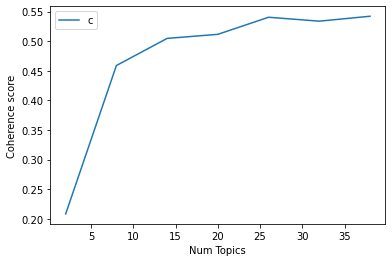

In [275]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [276]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.208
Num Topics = 8  has Coherence Value of 0.4588
Num Topics = 14  has Coherence Value of 0.5047
Num Topics = 20  has Coherence Value of 0.5116
Num Topics = 26  has Coherence Value of 0.5405
Num Topics = 32  has Coherence Value of 0.5338
Num Topics = 38  has Coherence Value of 0.5422


In [277]:
print(model_list)

[<gensim.models.wrappers.ldamallet.LdaMallet object at 0x0000023140017C18>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x00000231400175F8>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x00000231428A5198>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x0000023137C16C50>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x0000023134159080>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x00000231341594E0>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x00000231448EAB38>]


In [278]:
model_list[6].save('lada_positive_model.model')

In [279]:
# Select the model and print the topics
optimal_model = model_list[6] ##?? how to check optimal model
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(19,
  '0.529*"store" + 0.450*"grocery" + 0.007*"birx" + 0.005*"timing" + '
  '0.003*"staying" + 0.002*"athletes" + 0.002*"handing" + 0.000*"postal" + '
  '0.000*"peoples" + 0.000*"scientists"'),
 (0,
  '0.349*"store" + 0.277*"grocery" + 0.203*"hands" + 0.052*"washing" + '
  '0.025*"coughed" + 0.023*"regularly" + 0.019*"sanitize" + '
  '0.011*"pennsylvania" + 0.008*"deck" + 0.008*"deliberately"'),
 (26,
  '0.491*"store" + 0.455*"grocery" + 0.020*"clerk" + 0.017*"helped" + '
  '0.010*"wore" + 0.004*"thanked" + 0.001*"stayed" + 0.001*"venture" + '
  '0.000*"sucks" + 0.000*"courses"'),
 (23,
  '0.337*"grocery" + 0.323*"store" + 0.110*"worker" + 0.082*"die" + '
  '0.060*"died" + 0.051*"death" + 0.021*"joe" + 0.006*"thanking" + '
  '0.003*"charged" + 0.002*"thanked"'),
 (13,
  '0.506*"food" + 0.201*"shops" + 0.130*"demand" + 0.074*"supermarkets" + '
  '0.071*"buyers" + 0.006*"handing" + 0.005*"exhausted" + 0.004*"helped" + '
  '0.002*"times" + 0.000*"diy"'),
 (2,
  '0.360*"covid" + 0.352*"

In [280]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=DocumentList['Description']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=DocumentList['Description'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.0263,"store, grocery, hands, washing, coughed, regularly, sanitize, pennsylvania, deck, deliberately",
1,1,6.0,0.0488,"online, shopping, spree, offline, helped, pennsylvania, piling, explain, pleas, treatment",advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds order
2,2,6.0,0.0381,"online, shopping, spree, offline, helped, pennsylvania, piling, explain, pleas, treatment",coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak
3,3,11.0,0.0731,"stay, safe, home, informed, tuned, cleanliness, adoting, ayurved, dead, abuse",food stock one empty please panic enough food everyone take need stay calm stay safe
4,4,4.0,0.0416,"food, stock, organisations, grains, redistribute, spitting, times, handed, rid, stacking",ready supermarket outbreak paranoid food stock litteraly empty serious thing please panic causes shortage
5,5,28.0,0.0453,"sanitizer, hand, spray, surgical, diy, homemade, bacteria, antibacterial, aloe, timely",news region first confirmed covid case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods reports
6,6,19.0,0.0381,"store, grocery, birx, timing, staying, athletes, handing, postal, peoples, scientists",cashier grocery store sharing insights prove credibility commented civics class know talking
7,7,35.0,0.0345,"supermarket, groceries, time, queuing, sweep, exercise, charged, stamps, licking, covid",supermarket today buy toilet paper
8,8,6.0,0.0353,"online, shopping, spree, offline, helped, pennsylvania, piling, explain, pleas, treatment",due covid retail store classroom atlanta open walk business classes next two weeks beginning monday march continue process online phone orders normal thank understanding
9,9,6.0,0.0533,"online, shopping, spree, offline, helped, pennsylvania, piling, explain, pleas, treatment",corona prevention stop buy things cash use online payment methods corona spread notes also prefer online shopping home time fight covid


In [281]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1070,"store, grocery, hands, washing, coughed, regularly, sanitize, pennsylvania, deck, deliberately",poo gunk hands amp use hand sanitizer may sanitized hands still poo use soap amp water sanitize hands longer poo hands
1,1.0,0.0626,"supermarket, covid, helpful, food, contract, spitting, depression, handed, groceries, idiot",look changes search behavior brands helpful consumers via keyword helpful genuine take priority usual metrics
2,2.0,0.0717,"covid, demand, pandemic, spike, soars, donated, people, lottery, stays, regularly",organization serves toronto lgbtq community boosted meal services seeing big spike demand covid pandemic scrambling feed many need
3,3.0,0.1108,"prices, price, war, crude, lowest, illegal, complaint, pennsylvania, needed, stayed",reminder price gouging illegal californians protected experience illegal price gouging housing gas food essentials submit complaint office call
4,4.0,0.1069,"food, stock, organisations, grains, redistribute, spitting, times, handed, rid, stacking",covid emergency surplus food grants announced food redistribution organisations benefit government funding help cut food waste redistribute tonnes surplus stock coronavirus outbreak


In [282]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"store, grocery, hands, washing, coughed, regularly, sanitize, pennsylvania, deck, deliberately",4577.0,0.1112
1.0,6.0,"online, shopping, spree, offline, helped, pennsylvania, piling, explain, pleas, treatment",1129.0,0.0274
2.0,6.0,"online, shopping, spree, offline, helped, pennsylvania, piling, explain, pleas, treatment",915.0,0.0222
3.0,11.0,"stay, safe, home, informed, tuned, cleanliness, adoting, ayurved, dead, abuse",1477.0,0.0359
4.0,4.0,"food, stock, organisations, grains, redistribute, spitting, times, handed, rid, stacking",992.0,0.0241
...,...,...,...,...
41152.0,15.0,"food, stock, piling, pile, piled, likes, explain, grip, attitudes, die",NaN,NaN
41153.0,3.0,"prices, price, war, crude, lowest, illegal, complaint, pennsylvania, needed, stayed",NaN,NaN
41154.0,0.0,"store, grocery, hands, washing, coughed, regularly, sanitize, pennsylvania, deck, deliberately",NaN,NaN
41155.0,28.0,"sanitizer, hand, spray, surgical, diy, homemade, bacteria, antibacterial, aloe, timely",NaN,NaN


from gensim import corpora, models, similarities

# create corpus and dictionary
corpus = ...
dictionary = ...

# train model, this might takes time
model = models.LdaModel.LdaModel(corpus=corpus,id2word=dictionary, num_topics=200,passes=5, alpha='auto')
# save model to disk (no need to use pickle module)
model.save('lda.model')

# later on, load trained model from file
model =  models.LdaModel.load('lda.model')

# print all topics
model.show_topics(topics=200, topn=20)

# print topic 28
model.print_topic(109, topn=20)

# another way
for i in range(0, model.num_topics-1):
    print model.print_topic(i)

# and another way, only prints top words
for t in range(0, model.num_topics-1):
    print 'topic {}: '.format(t) + ', '.join([v[1] for v in model.show_topic(t, 20)])

import pickle
# your code
pickle.dump(lda,open(filename,'w'))
# you may load it back again
lda_copy = pickle.load(file(filename))